In [3]:
!pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
     ---------------------------------------- 3.8/3.8 MB 301.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [6]:
key="1ca766b5bc5c0eab34ed65d92595b67cb9db0bbb"

In [7]:
data = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\ABHINAV\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [8]:
data.to_csv('AAPL.csv')
data = pd.read_csv('AAPL.csv')

In [9]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-05-02 00:00:00+00:00,176.57,177.75,173.80,175.23,66539371,42.078129,42.359333,41.418015,41.758796,266157484,0.0,1.0
1,AAPL,2018-05-03 00:00:00+00:00,176.89,177.50,174.44,175.88,34068180,42.154388,42.299756,41.570532,41.913697,136272720,0.0,1.0
2,AAPL,2018-05-04 00:00:00+00:00,183.83,184.25,178.17,178.25,56201317,43.808249,43.908339,42.459423,42.478488,224805268,0.0,1.0
3,AAPL,2018-05-07 00:00:00+00:00,185.16,187.67,184.75,185.18,42451423,44.125199,44.723354,44.027493,44.129966,169805692,0.0,1.0
4,AAPL,2018-05-08 00:00:00+00:00,186.05,186.22,183.67,184.99,28402777,44.337294,44.377806,43.770120,44.084687,113611108,0.0,1.0


In [35]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-04-24 00:00:00+00:00,165.33,165.600,163.8900,165.000,41949581,165.33,165.600,163.8900,165.000,41949581,0.0,1.0
1253,AAPL,2023-04-25 00:00:00+00:00,163.77,166.305,163.7300,165.190,48714063,163.77,166.305,163.7300,165.190,48714063,0.0,1.0
1254,AAPL,2023-04-26 00:00:00+00:00,163.76,165.280,162.8000,163.055,44105745,163.76,165.280,162.8000,163.055,44105745,0.0,1.0
1255,AAPL,2023-04-27 00:00:00+00:00,168.41,168.560,165.1900,165.190,64902329,168.41,168.560,165.1900,165.190,64902329,0.0,1.0
1256,AAPL,2023-04-28 00:00:00+00:00,169.68,169.850,167.8801,168.490,55275851,169.68,169.850,167.8801,168.490,55275851,0.0,1.0


In [10]:
data1 = data.reset_index()['close']

In [11]:
data1

0       176.57
1       176.89
2       183.83
3       185.16
4       186.05
         ...  
1252    165.33
1253    163.77
1254    163.76
1255    168.41
1256    169.68
Name: close, Length: 1257, dtype: float64

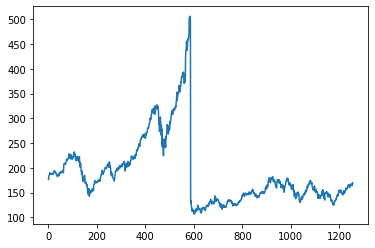

In [12]:
import matplotlib.pyplot as plt
plt.plot(data1)

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [68]:
len(data1)

1257

In [25]:
training_size = int(len(data1)*0.65)
test_size = len(data1)-training_size
train_data = data1[0:training_size,:]
test_data = data1[training_size:len(data1),:1]

In [26]:
training_size,test_size

(817, 440)

In [69]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [74]:
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [75]:
print(X_train.shape), print(y_train.shape)

(666, 150)
(666,)


(None, None)

In [76]:
print(X_test.shape), print(ytest.shape)

(289, 150)
(289,)


(None, None)

In [77]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [78]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 26s 1s/step - loss: 0.0343 - val_loss: 6.9515e-04
Epoch 2/100
11/11 [==============================] - 9s 804ms/step - loss: 0.0140 - val_loss: 0.0028
Epoch 3/100
11/11 [==============================] - 11s 1s/step - loss: 0.0118 - val_loss: 5.8288e-04
Epoch 4/100
11/11 [==============================] - 11s 1s/step - loss: 0.0096 - val_loss: 7.9872e-04
Epoch 5/100
11/11 [==============================] - 15s 1s/step - loss: 0.0106 - val_loss: 9.1420e-04
Epoch 6/100
11/11 [==============================] - 13s 1s/step - loss: 0.0090 - val_loss: 0.0016
Epoch 7/100
11/11 [==============================] - 13s 1s/step - loss: 0.0076 - val_loss: 5.8830e-04
Epoch 8/100
11/11 [==============================] - 12s 1s/step - loss: 0.0076 - val_loss: 0.0021
Epoch 9/100
11/11 [==============================] - 13s 1s/step - loss: 0.0069 - val_loss: 3.9458e-04
Epoch 10/100
11/11 [==============================] - 15s 1s/step - loss: 0.0062 - 

In [81]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

10/10 [==============================] - 2s 210ms/step


In [84]:
train_predict

array([[ 0.18051353],
       [ 0.1809112 ],
       [ 0.18106669],
       [ 0.180109  ],
       [ 0.17825149],
       [ 0.17576271],
       [ 0.173059  ],
       [ 0.17065845],
       [ 0.16813052],
       [ 0.16532329],
       [ 0.16262165],
       [ 0.15965155],
       [ 0.15604857],
       [ 0.15134536],
       [ 0.14545779],
       [ 0.14001666],
       [ 0.13553211],
       [ 0.13213249],
       [ 0.12989989],
       [ 0.12869501],
       [ 0.12662682],
       [ 0.12403923],
       [ 0.12124656],
       [ 0.11881316],
       [ 0.11720394],
       [ 0.11649559],
       [ 0.11637972],
       [ 0.11639208],
       [ 0.11667357],
       [ 0.11739486],
       [ 0.11858035],
       [ 0.12018591],
       [ 0.1216722 ],
       [ 0.1228994 ],
       [ 0.12370914],
       [ 0.12464523],
       [ 0.12566386],
       [ 0.12651913],
       [ 0.12824608],
       [ 0.13103248],
       [ 0.13458654],
       [ 0.13899973],
       [ 0.1442407 ],
       [ 0.14989717],
       [ 0.15513444],
       [ 0

In [85]:
test_predict

array([[0.15119068],
       [0.15056062],
       [0.14953396],
       [0.14787212],
       [0.14633663],
       [0.14471868],
       [0.14264268],
       [0.1397574 ],
       [0.1367575 ],
       [0.13449386],
       [0.13326427],
       [0.13332897],
       [0.13461372],
       [0.13712832],
       [0.14063846],
       [0.14511959],
       [0.15022849],
       [0.15560044],
       [0.16121773],
       [0.16664682],
       [0.1712047 ],
       [0.1746574 ],
       [0.17752527],
       [0.17958143],
       [0.18048416],
       [0.18039973],
       [0.17937107],
       [0.17717545],
       [0.17434469],
       [0.1716197 ],
       [0.16871944],
       [0.16570312],
       [0.1630041 ],
       [0.16076687],
       [0.15892725],
       [0.15692909],
       [0.15485679],
       [0.15217178],
       [0.14896466],
       [0.14630872],
       [0.14386463],
       [0.14162776],
       [0.13981077],
       [0.13916641],
       [0.13868414],
       [0.1380943 ],
       [0.13680844],
       [0.135

In [86]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [87]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

227.2845488204533

In [88]:
math.sqrt(mean_squared_error(ytest,test_predict))

154.70341552873342

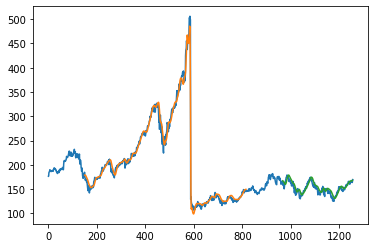

In [89]:
look_back=150
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [94]:
len(test_data)

440

In [95]:
x_input=test_data[290:].reshape(1,-1)
x_input.shape

(1, 150)

In [96]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [97]:
temp_input

[0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08926737633061982,
 0.07854727614276763,
 0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,
 0.07899812147777074,
 0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.0936255479023

In [98]:
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<150):
    
    if(len(temp_input)>150):
       
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
    
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15394804]
151
1 day input [0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386
 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976
 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587
 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449
 0.06376957 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017
 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698
 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666
 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 

In [106]:
day_new=np.arange(1,151)
day_pred=np.arange(101,251)

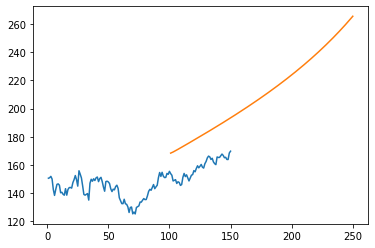

In [112]:
plt.plot(day_new,scaler.inverse_transform(data1[1107:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [109]:
data3=data1.tolist()
data3.extend(lst_output)

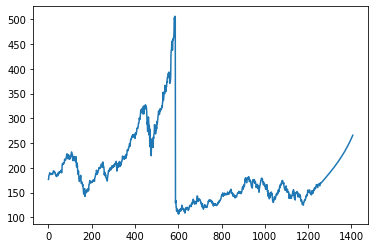

In [110]:
data3=scaler.inverse_transform(data3).tolist()
plt.plot(data3)